In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
#import sys
#sys.path.append('C:/Users/anton/git_repository/Exercise03')
import task4_functions as f

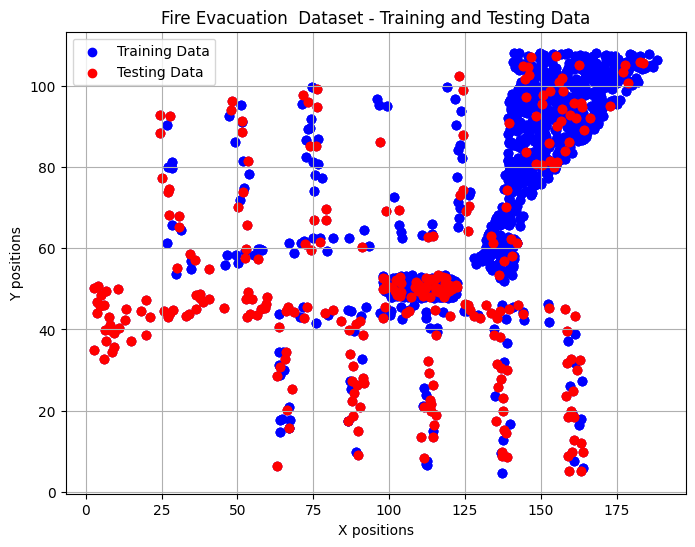

In [2]:
# Load the training and testing datasets
train_data = np.load("FireEvac_train_set.npy")
test_data = np.load("FireEvac_test_set.npy")

#print("train data shape : ", train_data.shape)
#print("test data shape : ", test_data.shape)

# Extract x and y positions from the datasets
x_train, y_train = train_data[:, 0], train_data[:, 1]
x_test, y_test = test_data[:, 0], test_data[:, 1]

        #Visualization (Q1)
# Create a scatter plot for the training dataset
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, c='blue', label='Training Data')

# Add the testing dataset to the plot
plt.scatter(x_test, y_test, c='red', label='Testing Data')

# Set plot labels and title
plt.xlabel('X positions')
plt.ylabel('Y positions')
plt.title('Fire Evacuation  Dataset - Training and Testing Data')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

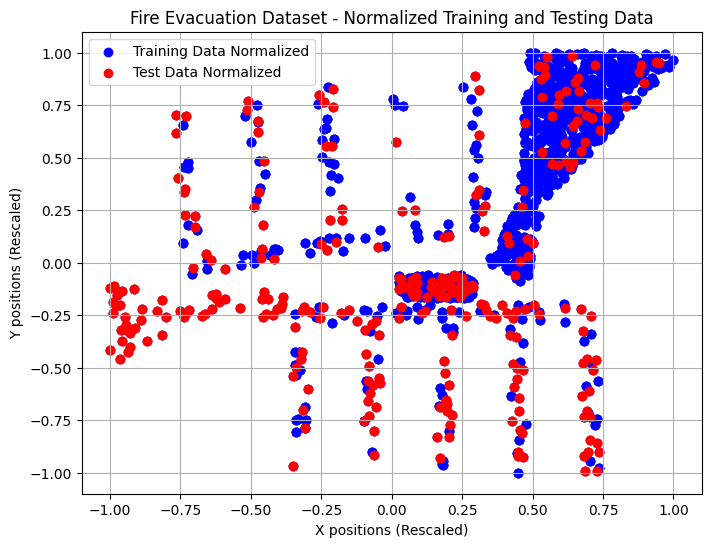

In [3]:
# Rescale the x and y values of the training dataset to [-1, 1]
train_min = np.min(train_data, axis=0)
train_max = np.max(train_data, axis=0)

train_data_scaled = -1 + (2 * (train_data - train_min) / (train_max - train_min))
test_data_scaled = -1 + (2 * (test_data - train_min) / (train_max - train_min))

# Create a scatter plot for the training dataset
plt.figure(figsize=(8, 6))
plt.scatter(train_data_scaled[:, 0], train_data_scaled[:, 1], c='blue', label='Training Data Normalized')
plt.scatter(test_data_scaled[:, 0], test_data_scaled[:, 1], c='red', label='Test Data Normalized')

# Set plot labels and title
plt.xlabel('X positions (Rescaled)')
plt.ylabel('Y positions (Rescaled)')
plt.title('Fire Evacuation Dataset - Normalized Training and Testing Data')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [4]:
data_shape = 2
latent_dim = 2
model, encoder, decoder = f.VAE(data_shape, latent_dim)

The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'decoder_stddev:0' shape=(2,) dtype=float32>
It is possible that this is intended behavior, but it is more likely
an omission. This is a strong indication that this layer should be
formulated as a subclassed Layer rather than a Lambda layer.


In [5]:
# Train the VAE and collect loss values at specific epochs
batch_size = 64

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True) # Stop training when the validation loss is no longer improving ie convergence is reached

history = model.fit(
    train_data_scaled,
    epochs=200,
    batch_size=batch_size,
    validation_data=(test_data_scaled, None),
    verbose=1,
    callbacks=[]
)
if early_stopping.stopped_epoch != 0:
    print("Convergence reached at epoch", early_stopping.stopped_epoch + 1)
else:
    print("Training ran for ", len(history.history['loss']) ," epochs without early stopping")

Epoch 1/200
47/47 [==============================] - 2s 7ms/step - loss: 1.2801 - val_loss: -0.6497
Epoch 2/200
47/47 [==============================] - 0s 4ms/step - loss: 0.8075 - val_loss: -2.0027
Epoch 3/200
47/47 [==============================] - 0s 3ms/step - loss: 0.6829 - val_loss: -2.2692
Epoch 4/200
47/47 [==============================] - 0s 3ms/step - loss: 0.6951 - val_loss: -3.0187
Epoch 5/200
47/47 [==============================] - 0s 3ms/step - loss: 0.5930 - val_loss: -3.5933
Epoch 6/200
47/47 [==============================] - 0s 3ms/step - loss: 0.5554 - val_loss: -3.8370
Epoch 7/200
47/47 [==============================] - 0s 3ms/step - loss: 0.4652 - val_loss: -3.8351
Epoch 8/200
47/47 [==============================] - 0s 3ms/step - loss: 0.5081 - val_loss: -3.6875
Epoch 9/200
47/47 [==============================] - 0s 3ms/step - loss: 0.4388 - val_loss: -3.7689
Epoch 10/200
47/47 [==============================] - 0s 3ms/step - loss: 0.4759 - val_loss: -3.8935

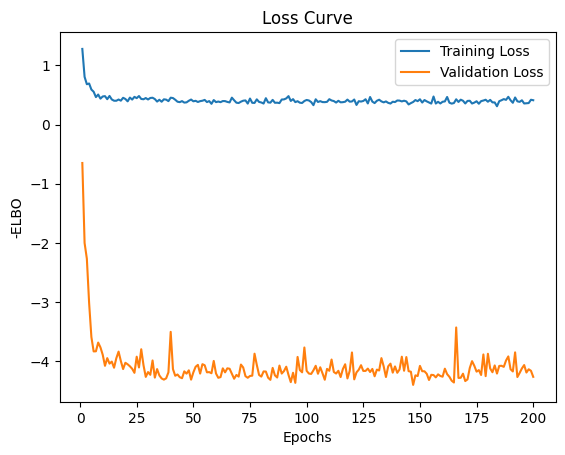

In [6]:

    #Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

    #Plot loss curve
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('-ELBO')
plt.title('Loss Curve')
plt.legend()
plt.show()


19/19 [==============================] - 0s 1ms/step


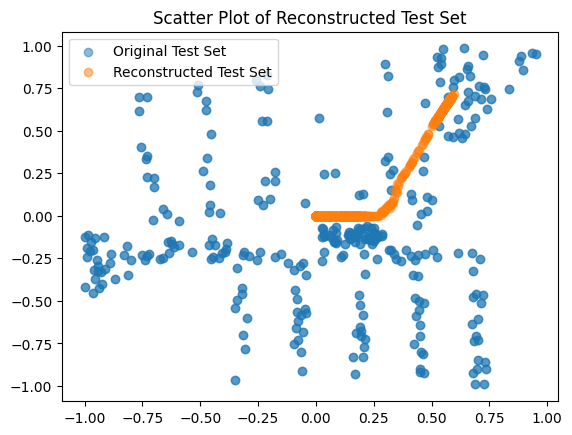

In [7]:
# Assuming x_test_normalized is your normalized test set
encoded_data = encoder.predict(test_data_scaled)
decoded_data = decoder.predict(encoded_data[2])  # Index 2 contains the sampled latent vectors

# Flatten the original and reconstructed test sets
x_test_flat = test_data_scaled.reshape(test_data_scaled.shape[0], -1)
decoded_data_flat = decoded_data.reshape(decoded_data.shape[0], -1)

# Make a scatter plot
plt.scatter(x_test_flat[:, 0], x_test_flat[:, 1], label='Original Test Set', alpha=0.5)
plt.scatter(decoded_data_flat[:, 0], decoded_data_flat[:, 1], label='Reconstructed Test Set', alpha=0.5)

plt.title('Scatter Plot of Reconstructed Test Set')
plt.legend()
plt.show()

32/32 [==============================] - 0s 1ms/step


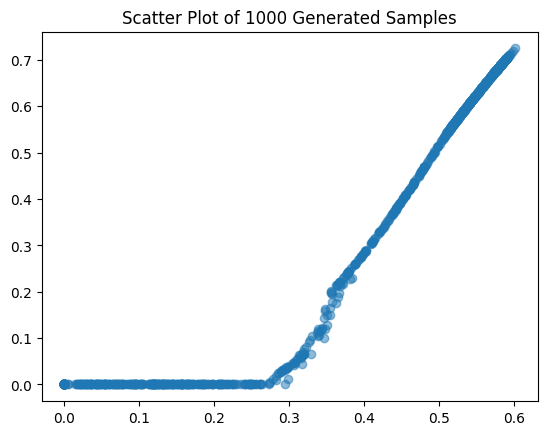

In [8]:
from matplotlib.patches import Rectangle

# Number of generated samples
num_samples = 1000

# Generate random latent vectors
random_latent_vectors = np.random.normal(size=(num_samples, latent_dim))

# Decode the latent vectors
generated_samples = decoder.predict(random_latent_vectors)

# Flatten the generated samples
generated_samples_flat = generated_samples.reshape(generated_samples.shape[0], -1)

# Make a scatter plot
plt.scatter(generated_samples_flat[:, 0], generated_samples_flat[:, 1], label='Generated Samples', alpha=0.5)
plt.title('Scatter Plot of 1000 Generated Samples')
plt.show()

157/157 [==============================] - 0s 1ms/step


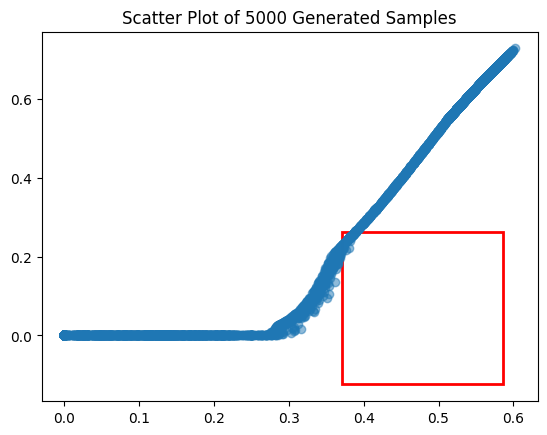

In [25]:
from matplotlib.patches import Rectangle

# Number of generated samples
num_samples = 5000

# Generate random latent vectors
random_latent_vectors = np.random.normal(size=(num_samples, latent_dim))

# Decode the latent vectors
generated_samples = decoder.predict(random_latent_vectors)

# Flatten the generated samples
generated_samples_flat = generated_samples.reshape(generated_samples.shape[0], -1)

# calculate rectangle
rectangle_top_left = (130, 70)
rectangle_bottom_right = (150, 50)

top_left_scaled = -1 + (2 * (rectangle_top_left - train_min) / (train_max - train_min))
bottom_right_scaled = -1 + (2 * (rectangle_bottom_right - train_min) / (train_max - train_min))

rectangle_width = abs(top_left_scaled[0] - bottom_right_scaled[0])
rectangle_height = top_left_scaled[1] - bottom_right_scaled[1]


# Plot the rectangle
rectangle = plt.Rectangle((top_left_scaled[0], top_left_scaled[1] - rectangle_height),
                          rectangle_width, rectangle_height,
                          edgecolor='red', linewidth=2, fill=False)

# Add the scaled rectangle to the plot
plt.gca().add_patch(rectangle)

# Make a scatter plot
plt.scatter(generated_samples_flat[:, 0], generated_samples_flat[:, 1], label='Generated Samples', alpha=0.5)
plt.title('Scatter Plot of 5000 Generated Samples')
plt.show()

In [26]:
# Rectangle coordinates
rectangle_top_left = (130, 70)
rectangle_bottom_right = (150, 50)

# Rescale the x and y values of the rectangle to [-1, 1]
rectangle_top_left = -1 + (2 * (rectangle_top_left - train_min) / (train_max - train_min))
rectangle_bottom_right = -1 + (2 * (rectangle_bottom_right - train_min) / (train_max - train_min))

# Count pedestrians inside the rectangle
pedestrians_inside = 0

for pedestrian in generated_samples:
    x, y = pedestrian
    if rectangle_top_left[0] <= x <= rectangle_bottom_right[0] and \
       rectangle_bottom_right[1] <= y <= rectangle_top_left[1]:
        pedestrians_inside += 1

print(f"Number of pedestrians inside the rectangle: {pedestrians_inside}")

Number of pedestrians inside the rectangle: 102
